In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
# Read the file with pandas and show the head of the file
filename = "loan.csv"
df = pd.read_csv(filename, delimiter=';')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349.0,360.0,1.0,Semiurban,N


En primer lugar, tenemos que cargar los datos para ver con qué vamos a trabajar. Por eso, podemos ver que este conjunto de datos está relacionado con los préstamos (créditos). Cada fila representa una solicitud de préstamo, y las columnas proporcionan información sobre diversos aspectos de cada solicitud. Breve descripción de cada columna:

| Nombres de Las Columnas | Descripción                                                                                    |
|-------------------------|------------------------------------------------------------------------------------------------|
| Loan_ID:                | Identificador único para cada solicitud de préstamo                                            |
| Gender:                 | Sexo del solicitante (p. ej. Male, Female)                                                     |
| Married:                | Estado civil del solicitante (p. ej. Yes o No)                                                 |
| Dependents:             | Número de beneficiarios del solicitante                                                        |
| Education:              | Nivel de estudios del solicitante (p. ej. Graduate o Not Graduate)                             |
| Self_Employed:          | Si el solicitante trabaja por cuenta propia (p. ej. Yes o No)                                  |
| ApplicantIncome:        | Ingresos del solicitante                                                                       |
| CoapplicantIncome:      | Ingresos del co-solicitante (si lo hay)                                                        |
| LoanAmount:             | El importe del préstamo solicitado                                                             |
| Loan_Amount_Term:       | Plazo/duración del préstamo                                                                    |
| Credit_History:         | Historial crediticio del solicitante (p. ej. 1 para Bueno, 0 para No Bueno)                    |
| Property_Area:          | La zona de la propiedad del solicitante (p. ej. Urban, Rural, Semiurban) |
| Loan_Status:            | Estado de aprobación del préstamo (p. ej. Y para Sí, N para No)                                |

# Pregunta 1
## Descripción de las variables y valores estadísticos (mínimo, máximo, media, desviación, mediana, etc.). Estudia qué valores estadísticos son los convenientes según el tipo de variable y procede en consecuencia.

In [3]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


In [4]:
df.describe(include=['object']).T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
CoapplicantIncome,614,287,0,273
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


El código describe() proporciona estadísticas resumidas de las columnas numéricas del DataFrame. Por otro lado, describe(include=['object']) proporciona estadísticas resumidas de las columnas de objetos (categóricas).

Pero algunas variables tienen que cambiar. La columna **Credit_History** no es una variable numérica porque muestra si el historial crediticio del solicitante es bueno o malo, así que tenemos que cambiarla de variable numérica a categórica. También la columna **CoapplicantIncome** debe ser una variable numérica, no categórica, porque muestra los ingresos del co-solicitante. Por lo tanto, también debemos convertir esta columna en una variable categórica.

---

In [5]:
# Show name of the columns
header = []
for row in df:
    header.append(row)
print("Header of dataframe: ", header)
print()
# Show the shape of the dataframe
print(f"Dimension of the dataframe:  {df.shape}")
print()
# Show the types of the columns
print(f"Types of the columns:\n{df.dtypes}")

Header of dataframe:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Dimension of the dataframe:  (614, 13)

Types of the columns:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome     object
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Aquí vemos header del DataFrame, es decir, los nombres de las columnas.
**df.dtypes** devuelve una Serie con el tipo de datos de cada columna del DataFrame. Proporciona información sobre los tipos de datos de las columnas, como int64, float64, object, datetime64, etc. Como hemos dicho antes, la columna **CoapplicantIncome** es un objeto, es decir, categórico, la columna **Credit_History** es float, es decir, numérico.

**df.shape** devuelve una tupla que representa las dimensiones del DataFrame. El primer elemento de la tupla es el número de filas, y el segundo elemento es el número de columnas.
La salida será una tupla como (filas, columnas) que representa las dimensiones de nuestro DataFrame.

Estos atributos son útiles para entender la estructura básica de nuestro DataFrame, incluyendo los tipos de datos de las columnas y el número de filas y columnas.

---

Ahora cambiamos los tipos de las columnas y volvemos a definir las variables y los valores estadísticos.

In [6]:
# Convert variable to numeric
df["CoapplicantIncome"] = pd.to_numeric(df["CoapplicantIncome"],errors = "coerce")

# Convert variable to object
df["Credit_History"] = df["Credit_History"].astype("object")

# categoricas = ["Loan_ID","Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]
# numericas = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Description of Numeric Columns
numeric_description = df.describe().T.to_string()
numeric_description_formatted = f"""
Description of the Numeric Columns:
{numeric_description}
"""

print(numeric_description_formatted)

# Description of Categorical Columns
categorical_description = df.describe(include=['object']).T.to_string()
categorical_description_formatted = f"""
Description of the Categorical Columns:
{categorical_description}
"""

print(categorical_description_formatted)


Description of the Numeric Columns:
                   count         mean          std    min     25%     50%     75%      max
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5  5795.0  81000.0
CoapplicantIncome  612.0  1624.906863  2930.199261    0.0     0.0  1211.5  2303.0  41667.0
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   168.0    700.0
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   360.0    480.0


Description of the Categorical Columns:
                count unique        top   freq
Loan_ID           614    614   LP001002      1
Gender            601      2       Male    489
Married           611      2        Yes    398
Dependents        599      4          0    345
Education         614      2   Graduate    480
Self_Employed     582      2         No    500
Credit_History  564.0    2.0        1.0  475.0
Property_Area     614      3  Semiurban    233
Loan_Status       614      2          Y    

In [7]:
# Show the number of missing values in each column
print(f"Number of missing values in each column:\n{df.isnull().sum()}")

Number of missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     2
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Cuando ejecutamos estos comandos (describe()), obtendremos una tabla con las estadísticas descritas para las columnas numéricas y de objetos de nuestro DataFrame.

Para las columnas numericas, obtenemos:
* Número de valores no nulos en cada columna numerica
* Valor media, mínimo, máximo y desviación estándar de cada columna numerica
* Mediana, primer cuartil (percentil 25) y tercer cuartil (percentil 75) de los valores de cada columna numerica

Para las columnas categoricas, obtenemos:
* Número de valores no nulos en cada columna categorica
* Número de valores únicos en cada columna categorica
* Valor más frecuente en cada columna categorica
* Frecuencia del valor más frecuente en cada columna categorica

---

In [8]:
categoricas = ["Loan_ID","Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Column name: Gender
Male      489
Female    112
Name: Gender, dtype: int64

Column name: Married
Yes    398
No     213
Name: Married, dtype: int64

Column name: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Column name: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Column name: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Column name: Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Column name: Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Column name: Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64



Estos bucles for también nos muestran cuántos valores se utilizan en cada columna categórica y cuántos de estos valores hay.

* En la columna **Loan_ID**, vemos que cada valor es único y se utiliza una vez.
* La columna de **Gender** muestra el género y podemos entender que 489 solicitantes son hombres y 112 solicitantes son mujeres.
* En la columna **Married**, 398 solicitantes están casados y 213 son solteros.
* En la columna **Dependents**, el número de beneficiarios del solicitante cambia entre 0 y 3. 345 solicitantes no tiene beneficiarios pero 102 solicitantes tiene 1, 101 solicitantes tiene 2 y 51 solicitantes tiene 3 y más beneficiarios.
* En la columna **Education**, vemos que 480 de los solicitantes son licenciados pero 134 no lo son.
* La columna **Self_Employed** indica el número del solicitante que trabaja por cuenta propia es 82 y el número del solicitante que trabaja en otros empleos es 500.
* La columna **Credit_History** nos dice que 475 solicitantes tienen un buen historial crediticio y 89 solicitantes tienen un mal historial crediticio
* En la columna **Property_Area**, podemos ver que 233 zonas en las que se encuentra la propiedad asociada al préstamo son semiurbanas, 202 zonas son urbanas y 179 zonas son rurales.
* En la columna **Loan_Status**, entendemos que el estado de aprobación del préstamo de 422 personas es positivo y el de 192 personas es negativo.

---

# Pregunta 2
## Describe y realiza modificaciones en la base datos si lo consideras necesario. Por ejemplo, qué harías con valores nominales, si los hubiera.

Los valores nominales se refieren a las categorías o clasificaciones de las características categóricas. Estas categorías representan diferentes agrupaciones de los datos sin ningún significado u orden numérico inherente. Hemos cargado nuestro fichero loan.csv y explicado las propiedades de las variables categóricas. Según éstas, vemos que 

* La característica **Gender** tiene dos categorías nominales: ***Male*** y ***Female***. 
* La característica **Married** tiene dos categorías: ***Yes*** y ***No***. 
* La característica **Dependents** tiene cuatro categorías: ***0***, ***1***, ***2*** y ***3+*** (Al ser ***3+***, es un valor nominal, no numérica).
* Del mismo modo, la característica **Education** tiene dos categorías nominales: ***Graduate*** y ***Not Graduate***.
* La característica **Self_Employed** tiene dos categorías: ***Yes*** y ***No***.
* La característica **Property_Area** tiene tres categorías: ***Urban***, ***Semiurban*** y ***Rural***.
* La característica **Loan_Status** tiene dos categorías: ***Y*** (Yes) y ***N*** (No).

Debemos convertir características nominales en representaciones numéricas para una mejor comprensión. Podemos utilizar Label encoding para ello.

**Label encoding:** Label encoding es otro método habitual para codificar características categóricas. Consiste en asignar valores numéricos a cada categoría de una característica. Los valores numéricos suelen asignarse en un orden secuencial, pero el orden en sí no tiene ningún significado inherente.

Ahora importamos la librería LabelEncoder

In [9]:
# Indicate the columns that have nominal values and encode them
cols = ["Gender","Married","Dependents","Self_Employed","Property_Area","Loan_Status"]
LabEn = LabelEncoder()

# Invert the encoding for the "Education" column
df["Education"] = 1 - LabEn.fit_transform(df["Education"])

# Encode other columns
df[cols] = df[cols].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index).convert_dtypes())

# Show the head of the dataframe
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0


Como la base de datos tiene valores nominales, la codificamos y modificamos utilizando la librería LabelEncoder pero al hacer esto dejamos los valores que faltan como "NA" porque lo consideraremos más adelante. Cuando realizamos esta codificación, los valores numéricos se asignaron en un orden secuencial como 0, 1, 2, 3. Los valores se asignan como sigue:

* Para la columna **Gender** &rarr; Female:0, Male:1
* Para la columna **Married** &rarr; No:0, Sí:1
* Como los valores de la columna **Dependientes** son 0, 1, 2, 3+, se asignan como 0:0, 1:1, 2:2, 3+:3
* Para la columna **Education**, normalmente se asigna como Graduate:0, Not Graduate:1, pero lo cambiamos a Graduate:1, Not Graduate:0 para que sea más fácil de entender
* Para la columna **Self_Employed** &rarr; No:0, Sí:1 
* Para la columna **Property_Area** &rarr; Rural:0, Semiurbano:1, Urbano:2 
* Para la columna **Loan_Status** &rarr; Y:1, N:0

---

# Pregunta 3
## Estudia si es necesario normalizar los datos y cómo lo harías. Procede a modificar la base de datos (normalizar) si lo consideras necesario.

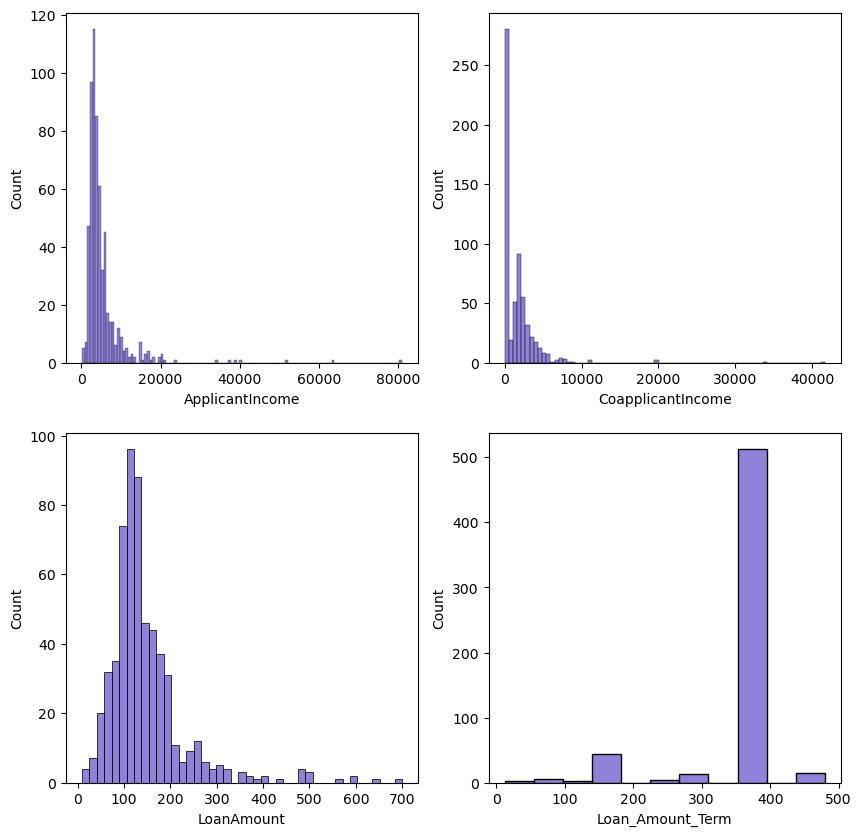

In [10]:
# Check if the data has a normal distribution using plots in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(x = df["ApplicantIncome"], ax=axes[0, 0], color="slateblue")
sns.histplot(x = df["CoapplicantIncome"], ax=axes[0, 1], color="slateblue")
sns.histplot(x = df["LoanAmount"], ax=axes[1, 0], color="slateblue")
sns.histplot(x = df["Loan_Amount_Term"], ax=axes[1, 1], color="slateblue")
plt.show()

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>]],
      dtype=object)

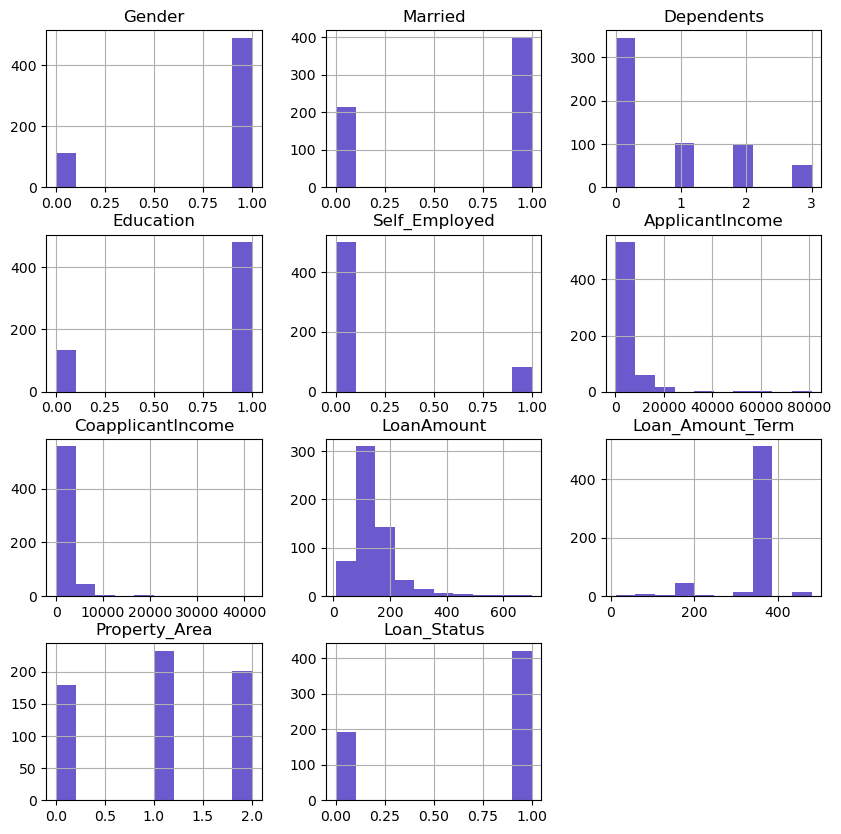

In [11]:
df.hist(figsize=(10, 10), color="slateblue")

En el caso del archivo loan.csv, no es necesario normalizar los datos. En realidad, la normalización dificultaría el uso de los datos, ya que requeriría uniones adicionales para obtener los datos que se necesitan.

No hay redundancia en los datos y los datos son relativamente sencillos. Cada columna contiene información única, por lo que no es necesario almacenar los mismos datos varias veces.

No es probable que los datos cambien muy a menudo. Los datos no son muy complejos. Sólo hay unas pocas columnas y los valores de cada columna son relativamente sencillos. Esto facilita la consulta y actualización de los datos sin necesidad de normalizarlos.

# Pregunta 4
## Detección de valores extremos (outliers) y descripción de qué harías en cada caso.

Podemos utilizar boxplot o violín para detectar valores atípicos. Revisamos cómo aparecen los valores atípicos utilizando ambos.

**BOXPLOT**

Box representa el rango intercuartílico (IQR), que es el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3). La longitud de la caja indica la dispersión del 50% medio de los datos.

Línea dentro de la caja: Esta línea representa la mediana (Q2) del conjunto de datos. Da una idea de la tendencia central de los datos.

Bigotes: Los bigotes se extienden desde los bordes de la caja hasta los valores mínimo y máximo dentro de un rango determinado. El rango puede basarse en una distancia especificada desde el IQR o puede extenderse a los valores mínimo y máximo dentro de los datos que no se consideran valores atípicos.

Valores atípicos dentro de los bigotes: Suelen considerarse valores atípicos leves y pueden representar valores extremos, pero siguen estando dentro de un rango razonable. Pueden ser puntos de datos válidos y formar parte de la variabilidad natural de los datos.

Valores atípicos más allá de los bigotes: Suelen considerarse valores atípicos más extremos. Pueden indicar errores en la introducción de datos, errores de medición u observaciones realmente inusuales.

**VIOLINPLOT**

Los gráficos violín son útiles para visualizar la forma y la dispersión de los datos e identificar patrones en la distribución.

En cuanto a los valores atípicos, los gráficos de violín no marcan explícitamente los valores atípicos. Sin embargo, proporcionan una buena representación visual de la distribución global, facilitando la identificación de las regiones del gráfico en las que los datos son más o menos densos. Los valores atípicos pueden ser evidentes si hay regiones delgadas en las colas del gráfico de violín.

Los gráficos violín se utilizan generalmente para visualizar la distribución de los datos en su conjunto. Para explicar violinplot:

* El punto blanco representa la mediana.
* La barra gruesa del centro representa el rango intercuartílico (IQR).
* Las líneas finas (bigotes) se extienden hasta los valores mínimo y máximo dentro de una cierta distancia del IQR.
* La anchura de la forma de violín en un valor concreto representa la densidad o frecuencia de puntos de datos en ese valor. Las secciones más anchas indican una mayor densidad.

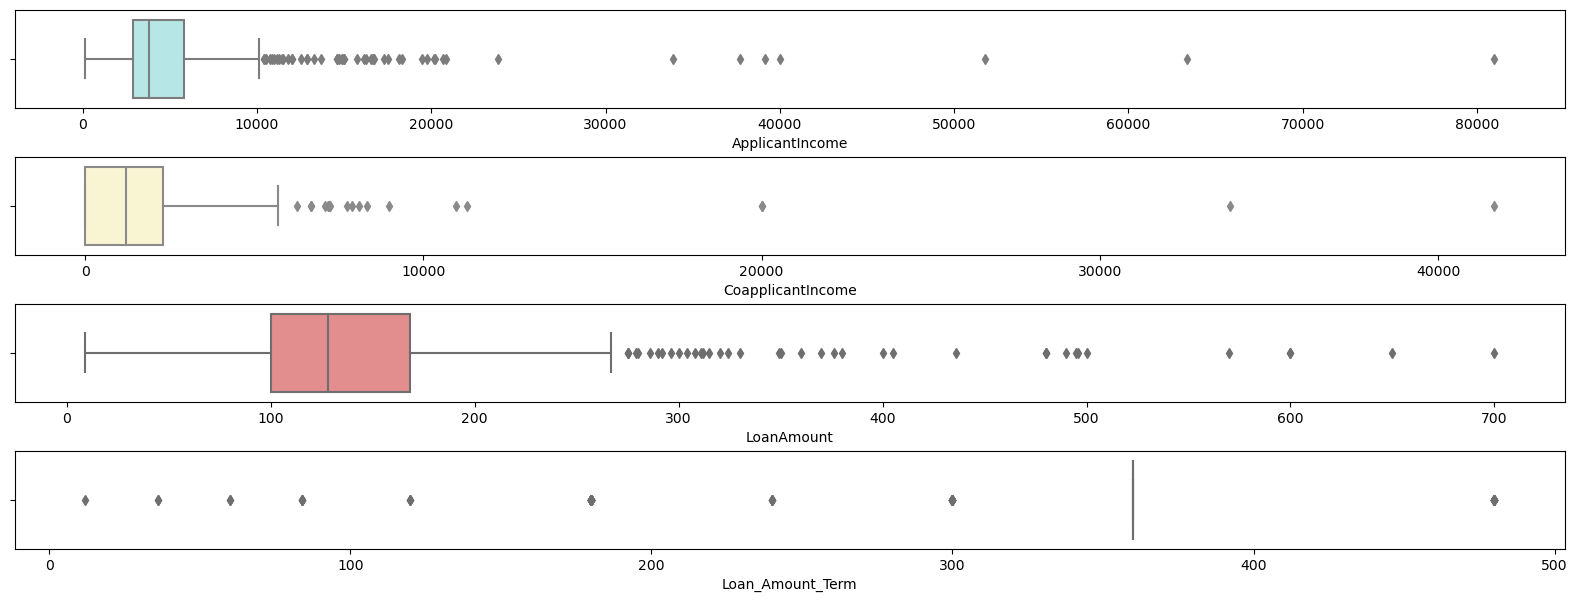

In [12]:
# Check if the data has outliers using boxplots for numeric columns in 4x1 grid with colors paleturquoise, lemonchiffon, lightcoral, violet
fig, axes = plt.subplots(4, 1, figsize=(20, 7))
sns.boxplot(x = df["ApplicantIncome"], ax=axes[0], color="paleturquoise")
sns.boxplot(x = df["CoapplicantIncome"], ax=axes[1], color="lemonchiffon")
sns.boxplot(x = df["LoanAmount"], ax=axes[2], color="lightcoral")
sns.boxplot(x = df["Loan_Amount_Term"], ax=axes[3], color="violet")
fig.subplots_adjust(hspace=0.5)
plt.show()


In [13]:
cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
# Drop the rows that have outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Basándose en la imagen de boxplot, pueden identificarse los siguientes valores atípicos:

* ApplicantIncome: Valores superiores a 10000
* CoapplicantIncome: Valores superiores a 5000
* LoanAmount: Valores superiores a 300000
* Loan_Amount_Term: Valores superiores y valores inferiores a 360 porque no hay un box para representar el rango intercuartílico. Por eso no podemos decir que todos los valores son valores atípicos.

Estos valores atípicos son significativos porque están muy por encima del rango intercuartílico (IQR) de las respectivas distribuciones. Esto sugiere que estos valores pueden representar casos inusuales o excepcionales, y podrían tener un impacto significativo en los resultados de cualquier análisis o modelización realizada sobre los datos.

Los valores atípicos pueden no ser necesariamente erróneos pero en este caso podemos considerar eliminar valores atípicos. Porque los valores atípicos en características como "ApplicantIncome", "CoapplicantIncome" o "LoanAmount" pueden tener un impacto desproporcionado en los modelos que predicen la aprobación de préstamos. Eliminar los valores extremos puede ayudar a garantizar que el modelo no se vea excesivamente influido por un pequeño número de casos atípicos.

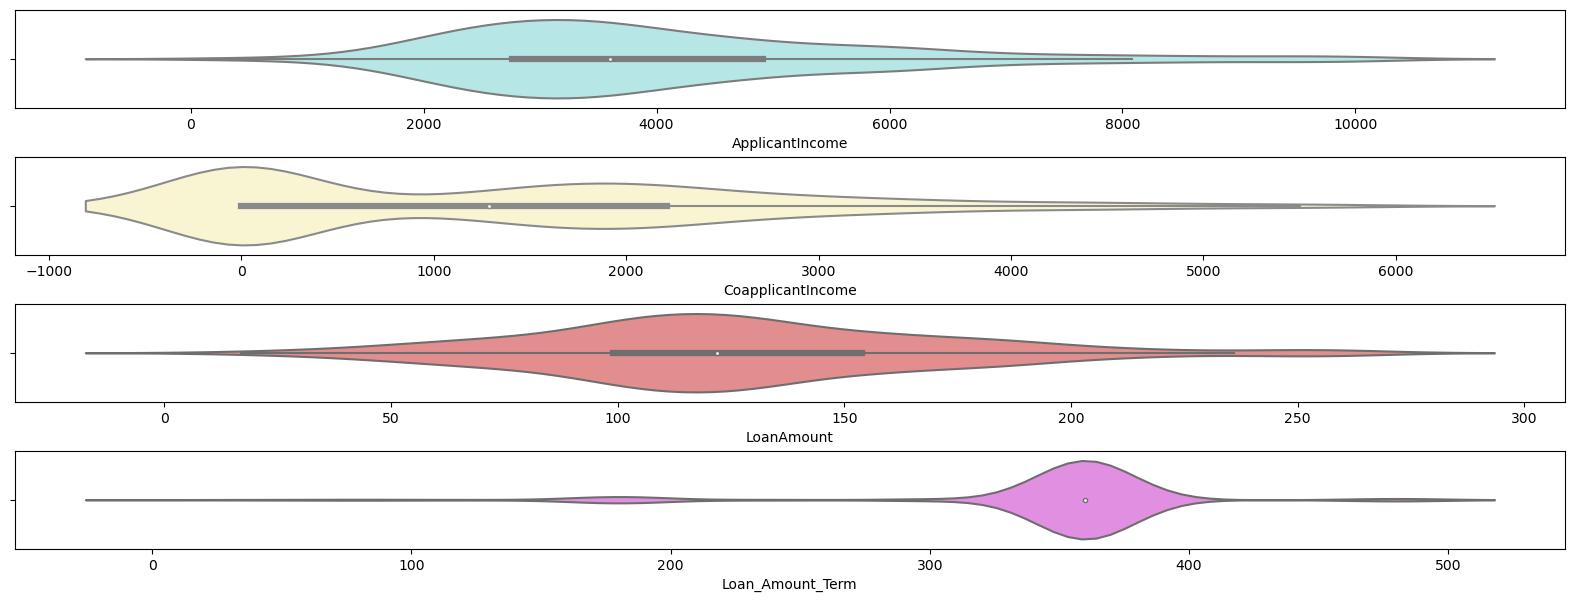

In [14]:
# Check if the data has outliers using violin for numeric columns in 4x1 grid with colors paleturquoise, lemonchiffon, lightcoral, violet
fig, axes = plt.subplots(4, 1, figsize=(20, 7))
sns.violinplot(x = df["ApplicantIncome"], ax=axes[0], color="paleturquoise")
sns.violinplot(x = df["CoapplicantIncome"], ax=axes[1], color="lemonchiffon")
sns.violinplot(x = df["LoanAmount"], ax=axes[2], color="lightcoral")
sns.violinplot(x = df["Loan_Amount_Term"], ax=axes[3], color="violet")
fig.subplots_adjust(hspace=0.5)
plt.show()

Además, si examinamos el gráfico de violín, observamos resultados similares. Después de eliminar los valores atípicos, podemos verlos con violinplot.

Violinplot ofrece una representación visual de la distribución y la densidad de los datos. Sin embargo, el boxplot ofrece un ejemplo más claro de los valores atípicos, haciéndolos más evidentes. El hecho de que el boxplot se centre en los cuartiles lo convierte en una herramienta útil y potente para identificar valores extremos en el conjunto de datos.

# Pregunta 5
## Detección de valores perdidos (missing values) y descripción de cómo actuarías para solventar el problema.

Obtenemos un resumen de un DataFrame con información sobre la estructura, los tipos de datos y los valores que faltan en el DataFrame con **info()**. Además, nos muestra índice, nombres de columnas, uso de memoria, recuento de no nulos de DataFrame.

In [15]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            537 non-null    object 
 1   Gender             528 non-null    Int64  
 2   Married            534 non-null    Int64  
 3   Dependents         523 non-null    Int64  
 4   Education          537 non-null    int64  
 5   Self_Employed      508 non-null    Int64  
 6   ApplicantIncome    537 non-null    int64  
 7   CoapplicantIncome  535 non-null    float64
 8   LoanAmount         517 non-null    float64
 9   Loan_Amount_Term   523 non-null    float64
 10  Credit_History     493 non-null    object 
 11  Property_Area      537 non-null    Int64  
 12  Loan_Status        537 non-null    Int64  
dtypes: Int64(6), float64(3), int64(2), object(2)
memory usage: 61.9+ KB


Observamos que en las variables Gender, Married, Dependents, Self_Employed, CoapplicantIncome, LoanAmount, Loan_Amount_Term y Credit_History hay menos instancias. Esto significa que hay valores perdidos. 

Para identificar y cuantificar estos valores perdidos, podemos utilizar el método **isnull()**, seguido del método sum() para contar el número de valores perdidos en cada columna.

In [16]:
# Check if the data has missing values and show the number of missing values in each column
print("Missing values per column: ")
print(df.isnull().sum(axis=0))
print("Total missing values: ", df.isnull().sum().sum())

Missing values per column: 
Loan_ID               0
Gender                9
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     2
LoanAmount           20
Loan_Amount_Term     14
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64
Total missing values:  135


In [17]:
# See how many missing data there are in each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Loan_ID
False    537
Name: Loan_ID, dtype: int64

Gender
False    528
True       9
Name: Gender, dtype: int64

Married
False    534
True       3
Name: Married, dtype: int64

Dependents
False    523
True      14
Name: Dependents, dtype: int64

Education
False    537
Name: Education, dtype: int64

Self_Employed
False    508
True      29
Name: Self_Employed, dtype: int64

ApplicantIncome
False    537
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    535
True       2
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    517
True      20
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    523
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    493
True      44
Name: Credit_History, dtype: int64

Property_Area
False    537
Name: Property_Area, dtype: int64

Loan_Status
False    537
Name: Loan_Status, dtype: int64



Encontramos que las siguientes columnas no tienen valores perdidos: **Loan_ID**, **Education**, **ApplicantIncome**, **Property_Area** y **Loan_Status**. 

Sin embargo, las columnas **Gender**, **Married**, **Dependents**, **Self_Employed**, **CoapplicantIncome**, **LoanAmount**, **Loan_Amount_Term** y **Credit_History** tienen valores perdidos. Específicamente:

* **Gender** tiene 9 valores perdidos.
* **Married** tiene 3 valores perdidos.
* **Dependents** tiene 14 valores perdidos.
* **Self_Employed** tiene 29 valores perdidos.
* **CoapplicantIncome** tiene 2 valores perdidos.
* **LoanAmount** tiene 20 valores perdidos.
* **Loan_Amount_Term** tiene 14 valores perdidos.
* **Credit_History** tiene 44 valores perdidos.

Podemos ver si faltan valores en la cabeza y en la cola del DataFrame con el método **any()**.

In [18]:
# Check which rows have missing values and show head
print("Rows with missing values: ")
# Show the head rows with missing values
print("Head :\n", df[df.isnull().any(axis=1)].isnull().head())
print()
# Show the tail rows with missing values
print("Tail :\n", df[df.isnull().any(axis=1)].isnull().tail())

Rows with missing values: 
Head :
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0     False   False    False       False      False          False   
11    False   False    False       False      False           True   
16    False   False    False       False      False          False   
19    False   False    False       False      False           True   
23    False    True    False       False      False          False   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             False              False        True             False   
11            False              False       False             False   
16            False              False       False             False   
19            False              False       False              True   
23            False              False       False             False   

    Credit_History  Property_Area  Loan_Status  
0            False          False        False  
11           

Ahora veamos como manejar valores perdidos.

Para eliminar valores perdidos de un DataFrame podemos utilizar la función **dropna()**.

Para rellenar los valores perdidos con un valor especificado o usando varias estrategias de relleno podemos usar la función **fillna()**.

Como la mayoría de las entradas de la columna no están vacías, no es necesario eliminarla, podemos cambiar o sustituir los datos.

In [19]:
# Fill the missing values with the mean and mode of the column
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

# Check if the data has missing values and show the number of missing values in each column
print("Missing values per column: ")
print(df.isnull().sum(axis=0))
print("Total missing values: ", df.isnull().sum().sum())

Missing values per column: 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Total missing values:  0


In [20]:
# Show the 20 first rows of the dataframe
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,126.833656,360.000000,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.000000,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.000000,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.000000,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.000000,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.000000,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.000000,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.000000,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.000000,1.0,2,1
10,LP001024,1,1,2,1,0,3200,700.0,70.000000,360.000000,1.0,2,1


In [21]:
# Show the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            537 non-null    object 
 1   Gender             537 non-null    Int64  
 2   Married            537 non-null    Int64  
 3   Dependents         537 non-null    Int64  
 4   Education          537 non-null    int64  
 5   Self_Employed      537 non-null    Int64  
 6   ApplicantIncome    537 non-null    int64  
 7   CoapplicantIncome  537 non-null    float64
 8   LoanAmount         537 non-null    float64
 9   Loan_Amount_Term   537 non-null    float64
 10  Credit_History     537 non-null    float64
 11  Property_Area      537 non-null    Int64  
 12  Loan_Status        537 non-null    Int64  
dtypes: Int64(6), float64(4), int64(2), object(1)
memory usage: 61.9+ KB


Hemos solucionado el problema de los valores que faltaban rellenándolos con el valor medio o la moda de cada columna. Así nos aseguramos de que los datos están completos y listos para el análisis.

Después de esta "corrección", volvimos a comprobar que no faltaban más valores en nuestro conjunto de datos.

Dado que hemos convertido las características categóricas en representaciones numéricas, todas las columnas excepto la columna categórica Loan_ID son ahora numéricas. 

Al observar sus correlaciones, observamos que todas las columnas numéricas están correlacionadas, excepto la columna categórica Loan_ID.

---

# Pregunta 6
##  Buscar correlaciones entre:
### - las variables predictoras, lo que permitirá ver si hay variables redundantes.
### - variables predictoras y la clase (target).

### Buscamos correlaciones entre las variables predictoras, lo que permitirá ver si hay variables redundantes.


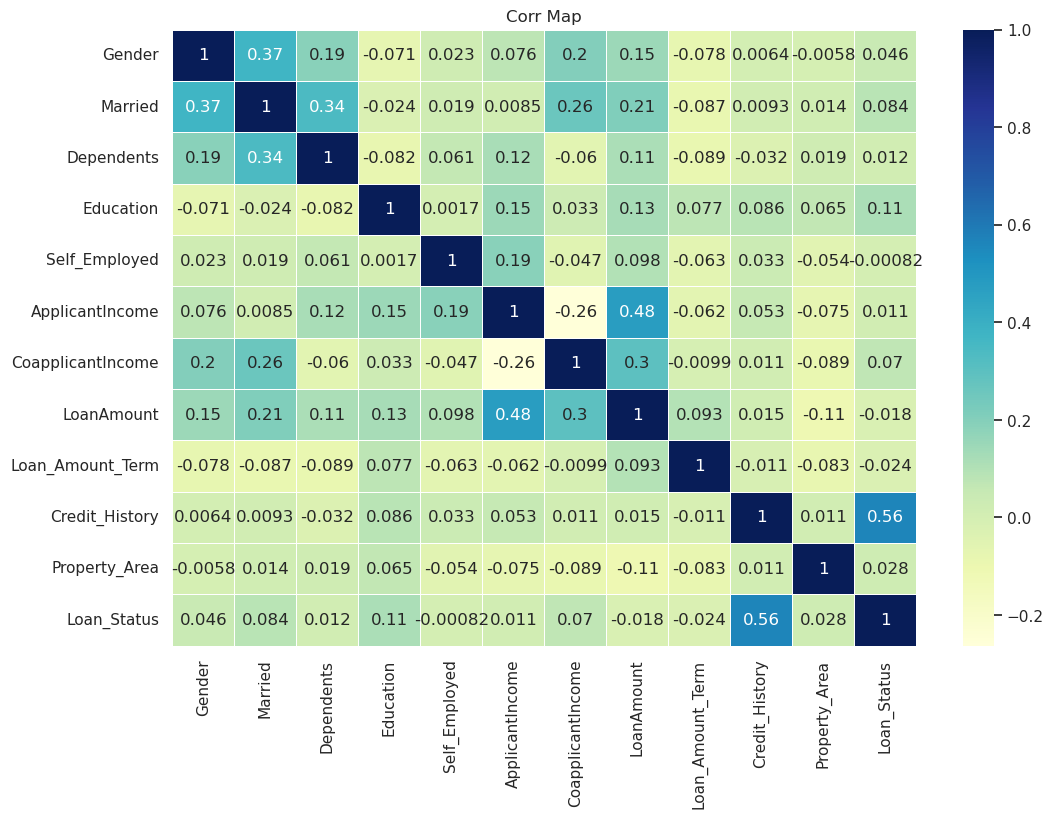

In [22]:
# Check the correlation between columns
corr = df.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu").set_title('Corr Map')
plt.show()


Las **variables predictoras** son las variables que tienen una correlación fuerte o moderada con la target y, por lo tanto, ayuda a explicar o predecir la variable target. Podemos decir que la variable predictora es **Credit_History** pero podemos decir que **ApplicantIncome**, **CoapplicantIncome** y **Education** son las variables predictoras porque estas variables ayuda a explicar o predecir la variable target Loan_Status.

**Target** es la variable que desea predecir o explicar utilizando el modelo. Basándose en esta mapa de correlación, la variable target es el **Loan_Status**. Es la variable cuyo resultado queremos conocer en función de otras variables.

Una **variable redundante** es una variable que tiene una alta correlación con otra **variable predictora** y, por lo tanto, no añade ninguna información nueva al modelo. Basándose en esta mapa de correlación, las variables redundantes son **Loan_Amount** (porque tiene correlación con ApplicantIncome), **Gender** (porque tiene correlación con CoapplicantIncome).

---

Vemos que cuanto más oscuro es el color, más fuerte es la correlación.

Las correlaciones entre las columnas:

**ApplicantIncome** y **LoanAmount** están correlacionadas positivamente (0,48). Esto significa que existe una fuerte relación positiva entre estas dos variables. Esto significa que los solicitantes con mayores ingresos tienden a pedir préstamos más grandes.

**CoapplicantIncome** y **LoanAmount** están correlacionadas positivamente (0,3). Esto significa que existe una débil relación positiva intermedio entre estas dos variables. Esto significa que los solicitantes con mayores ingresos de co-solicitante tienden a pedir préstamos más grandes.

**Credit_History** y **Loan_Status** están fuertemente correlacionadas (0,56). Esto significa que existe una fuerte relación positiva entre estas dos variables. Esto significa que los solicitantes con un buen historial crediticio tienen más probabilidades de que les aprueben el préstamo.

**Loan_Status** y **CoapplicantIncome** están correlacionadas positivamente (0,07). Esto significa que existe una ligera tendencia a que los solicitantes con ingresos del co-solicitante tengan más probabilidades de ser aprobados.

**Loan_Status** y **Education** están correlacionadas positivamente (0,11). Esto significa que existe una ligera tendencia a que los solicitantes que se han licenciado tengan más probabilidades de que se les apruebe un préstamo.

**Dependents** y **Married** están correlacionadas positivamente (0,34). Esto significa que existe una ligera relación positiva entre estas dos variables. Esto significa que es ligeramente más probable que los solicitantes casados tengan personas beneficiarias.

**Education** y **LoanAmount** están correlacionados positivamente (0,13). Esto significa que existe una débil relación positiva entre estas dos variables. Esto significa que los solicitantes con mayores niveles de educación tienden a pedir préstamos más grandes.

**Married** y **LoanAmount** están correlacionadas positivamente (0,21). Esto significa que existe una débil relación positiva entre estas dos variables. Esto significa que los solicitantes casados tienden a pedir préstamos ligeramente mayores.

**LoanAmount** y **Gender** están correlacionadas positivamente (0,15). Esto indica que existe una débil relación positiva entre estas dos variables. Esto significa que existe una ligera tendencia a que las hombres soliciten préstamos ligeramente mayores que los mujeres.

**ApplicantIncome** y **Education** están correlacionadas positivamente (0,15). Esto indica que existe una débil relación positiva entre estas dos variables. Esto significa que existe una ligera tendencia a que los solicitantes con mayores niveles educativos tengan mayores ingresos.

**CoapplicantIncome** y **Married** están correlacionadas positivamente (0,26). Esto indica que existe una débil relación positiva entre estas dos variables. Esto significa que los solicitantes casados tienen más probabilidades de tener ingresos co-solicitante.

**CoapplicantIncome** y **Gender** están correlacionadas positivamente (0,2). Esto significa que los solicitantes hombres tienen más probabilidades de tener ingresos co-solicitante.

**LoanAmount** y **Loan_Status**: Una correlación negativa de -0,018 entre LoanAmount y Loan_Status indica que existe una débil relación negativa entre estas dos variables. Esto significa que existe una ligera tendencia a asociar los préstamos de mayor cuantía con una menor probabilidad de aprobación. Esto podría deberse al hecho de que los prestamistas consideran que los préstamos de mayor cuantía son inversiones más arriesgadas.

### Buscamos correlaciones entre variables predictoras y la clase (target).

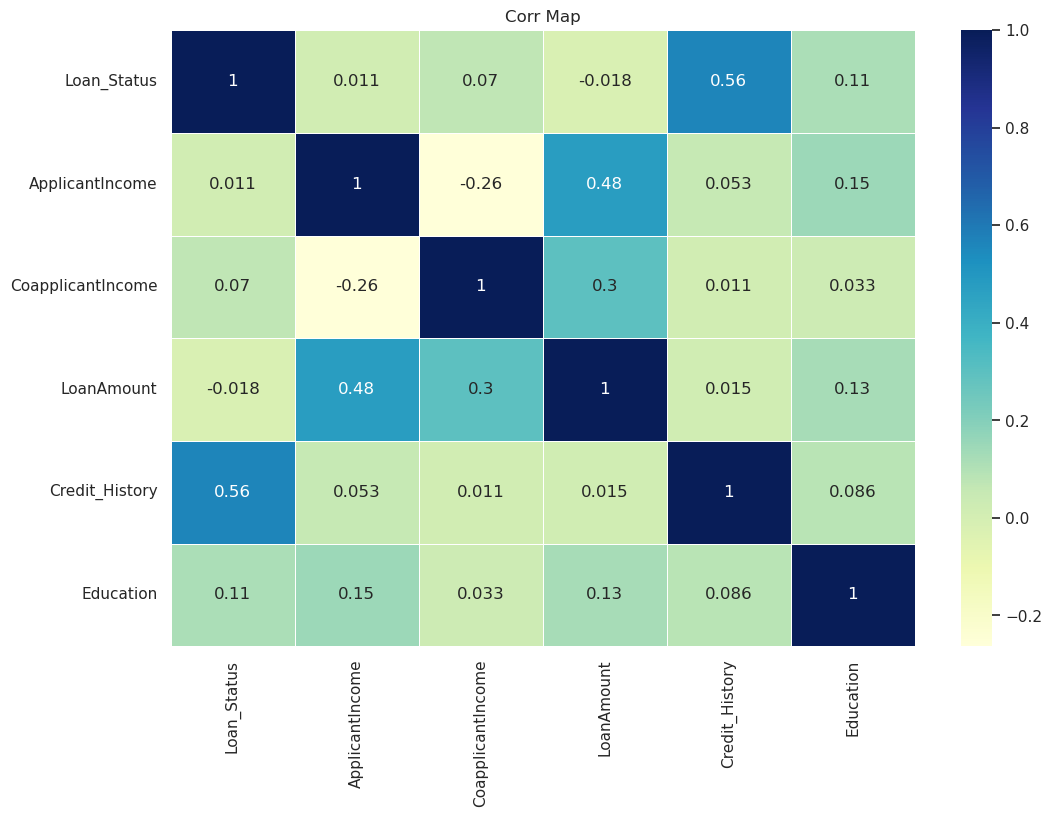

In [23]:
# Show the correlation between Loan_Status and Predictor Variables
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df[['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Education']].corr(),linewidths=.5, annot=True, cmap="YlGnBu").set_title('Corr Map')
plt.show()

---

# Pregunta 7
## Detecta, si hubiera, falsos predictores.

Un **falso predictor** es una variable que no tiene correlación o tiene una correlación muy débil con la variable target y, por lo tanto, no contribuye al poder predictivo del modelo, es decir, es menos probable que estas características sean informativas y puede que no contribuyan significativamente a realizar predicciones precisas.

Basándonos en este mapa de correlaciones, algunos ejemplos de falso predictore es **Self_Employed** porque **Self_Employed** y **Loan_Status** no están correlacionadas (-0.00082). Esto significa que no contribuye a hacer predicciones al modelo.

---

# Pregunta 8
## Estudia si fuera conveniente segmentar alguna de las variables.

La categorización de los valores suele mejorar la interpretabilidad de los análisis estadísticos de DataFrame. Permite comprender los resultados de una manera más sencilla.

* Por valor: Podemos segmentar las variables por el rango de valores, como bajo, medio o alto. Por ejemplo, Podemos segmentar la variable ApplicantIncome en grupos de ingresos bajos (menos de 5000), medios (entre 5000 y 10000) y altos (más de 10000). La segmentación por valor puede ayudarnos a comprender la distribución y la variación de los datos, y a comparar las características y los resultados de los distintos grupos.

In [24]:
# Segmenting 'ApplicantIncome' into income bands
income_bins = np.linspace(min(df["ApplicantIncome"]), max(df["ApplicantIncome"]), 5)
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['Income_Level'] = pd.cut(df['ApplicantIncome'], bins=income_bins, labels=income_labels, include_lowest=True)
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Level
0,LP001002,1,0,0,1,0,5849,0.0,126.833656,360.000000,1.0,2,1,High
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.000000,1.0,0,0,Medium
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.000000,1.0,2,1,Medium
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.000000,1.0,2,1,Low
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.000000,1.0,2,1,High
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.000000,1.0,2,1,High
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.000000,1.0,2,1,Low
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.000000,0.0,1,0,Medium
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.000000,1.0,2,1,Medium
10,LP001024,1,1,2,1,0,3200,700.0,70.000000,360.000000,1.0,2,1,Medium


In [25]:
# Segmenting 'LoanAmount' into loan bands
loan_bins = np.linspace(min(df["LoanAmount"]), max(df["LoanAmount"]), 5)
loan_labels = ['Low', 'Medium', 'High', 'Very High']
df['Loan_Level'] = pd.cut(df['LoanAmount'], bins=loan_bins, labels=loan_labels, include_lowest=True)
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Level,Loan_Level
0,LP001002,1,0,0,1,0,5849,0.0,126.833656,360.000000,1.0,2,1,High,Medium
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.000000,1.0,0,0,Medium,Medium
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.000000,1.0,2,1,Medium,Low
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.000000,1.0,2,1,Low,Medium
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.000000,1.0,2,1,High,High
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.000000,1.0,2,1,High,Very High
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.000000,1.0,2,1,Low,Medium
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.000000,0.0,1,0,Medium,High
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.000000,1.0,2,1,Medium,High
10,LP001024,1,1,2,1,0,3200,700.0,70.000000,360.000000,1.0,2,1,Medium,Low


In [26]:
# Segmenting 'Loan_Amount_Term' into term bands
term_bins = np.linspace(min(df["Loan_Amount_Term"]), max(df["Loan_Amount_Term"]), 5)
term_labels = ['Low', 'Medium', 'High', 'Very High']
df['Term_Level'] = pd.cut(df['Loan_Amount_Term'], bins=term_bins, labels=term_labels, include_lowest=True)
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Level,Loan_Level,Term_Level
0,LP001002,1,0,0,1,0,5849,0.0,126.833656,360.000000,1.0,2,1,High,Medium,High
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.000000,1.0,0,0,Medium,Medium,High
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.000000,1.0,2,1,Medium,Low,High
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.000000,1.0,2,1,Low,Medium,High
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.000000,1.0,2,1,High,High,High
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.000000,1.0,2,1,High,Very High,High
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.000000,1.0,2,1,Low,Medium,High
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.000000,0.0,1,0,Medium,High,High
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.000000,1.0,2,1,Medium,High,High
10,LP001024,1,1,2,1,0,3200,700.0,70.000000,360.000000,1.0,2,1,Medium,Low,High


# Pregunta 9
## Estudia si fuera conveniente crear nuevas variables sintéticas basada en las variables originales.

Las **variables sintéticas**, también conocidas como variables derivadas o variables construidas, son nuevas variables creadas a partir de variables existentes en un conjunto de datos mediante operaciones matemáticas, transformaciones o combinaciones. Estas variables de nueva generación no se observan ni miden directamente, sino que se construyen para capturar información o relaciones específicas dentro de los datos. El objetivo de la creación de variables sintéticas es proporcionar información adicional, mejorar el análisis o el rendimiento de los modelos.

* Calculando el ratio LoanAmount/Loan_Amount_Term, pretendemos estimar el importe del pago diario del préstamo. El análisis de esta variable sintética puede proporcionar información sobre la asequibilidad y ayudar a predecir Loan_Status. También nos permite explorar posibles correlaciones con las variables.

* Al calcular el ratio LoanAmount/ApplicantIncome, pretendemos comprender cuántas veces los ingresos de una persona pueden cubrir el importe del préstamo. Este ratio proporciona una medida de la asequibilidad y ayuda a evaluar la capacidad financiera del solicitante. El análisis de esta variable sintética puede ayudar a predecir Loan_Status, ya que refleja la proporción de ingresos destinada a devolver el préstamo. También nos permite explorar posibles correlaciones con las variables del conjunto de datos.

In [27]:
# Add synthetic variables to the dataframe as LoanAmount/Loan_Amount_Term and LoanAmount/ApplicantIncome named as Loan_Daily_Ratio and Income_Loan_Ratio
df["Loan_Daily_Ratio"] = df["LoanAmount"] / df["Loan_Amount_Term"]
df["Income_Loan_Ratio"] = df["LoanAmount"] / df["ApplicantIncome"]
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Level,Loan_Level,Term_Level,Loan_Daily_Ratio,Income_Loan_Ratio
0,LP001002,1,0,0,1,0,5849,0.0,126.833656,360.000000,1.0,2,1,High,Medium,High,0.352316,0.021685
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.000000,1.0,0,0,Medium,Medium,High,0.355556,0.027929
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.000000,1.0,2,1,Medium,Low,High,0.183333,0.022000
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.000000,1.0,2,1,Low,Medium,High,0.333333,0.046458
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.000000,1.0,2,1,High,High,High,0.391667,0.023500
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.000000,1.0,2,1,High,Very High,High,0.741667,0.049289
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.000000,1.0,2,1,Low,Medium,High,0.263889,0.040720
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.000000,0.0,1,0,Medium,High,High,0.438889,0.052042
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.000000,1.0,2,1,Medium,High,High,0.466667,0.041937
10,LP001024,1,1,2,1,0,3200,700.0,70.000000,360.000000,1.0,2,1,Medium,Low,High,0.194444,0.021875
